In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path ke file ZIP di Google Drive
zip_path = '/content/drive/MyDrive/DL_ASIK/Kucing.zip'

# Direktori tujuan ekstraksi
extract_path = '/content/drive/MyDrive/DL_ASIK/Gambar/'



In [ ]:
# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Memastikan file telah diekstrak
extracted_files = os.listdir(extract_path)
print(extracted_files)

['Kucing']


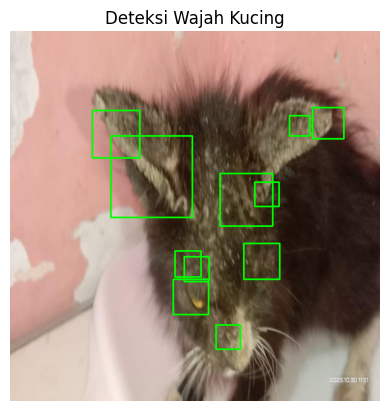

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Memuat gambar
image = cv2.imread('/content/drive/MyDrive/DL_ASIK/Gambar/Kucing/sakit/kucing sakit (1000).jpg')

# Memuat model cascade yang telah dilatih untuk mendeteksi wajah kucing
cat_face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/DL_ASIK/haarcascade_frontalcatface.xml')

# Mengonversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mendeteksi wajah kucing
faces = cat_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Pre-processing menggunakan ANN
# Menyiapkan data untuk pelatihan model ANN
face_data = []
for (x, y, w, h) in faces:
    face_roi = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face_roi, (64, 64))  # Resize gambar ke ukuran tetap
    face_flattened = face_resized.flatten()  # Mengubah matriks menjadi vektor satu dimensi
    face_data.append(face_flattened)

face_data = np.array(face_data)

# Standardisasi data
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# Membuat dan melatih model ANN
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
labels = np.ones(len(face_data))  # Label dummy (misal: 1 untuk semua wajah kucing yang terdeteksi)
mlp.fit(face_data_scaled, labels)

# Menandai posisi wajah pada gambar
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mengubah gambar dari BGR (OpenCV) ke RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar dengan Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Menghilangkan sumbu
plt.title('Deteksi Wajah Kucing')
plt.show()

Akurasi model: 88.01%
Model disimpan di /content/drive/MyDrive/DL_ASIK/mlp_model.pkl
Scaler disimpan di /content/drive/MyDrive/DL_ASIK/scaler.pkl
Gambar diprediksi sebagai: Sehat


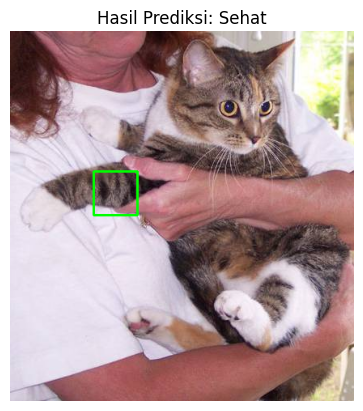

Gambar diprediksi sebagai: Sakit


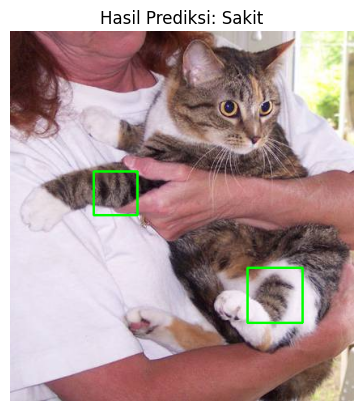

Gambar diprediksi sebagai: Sehat


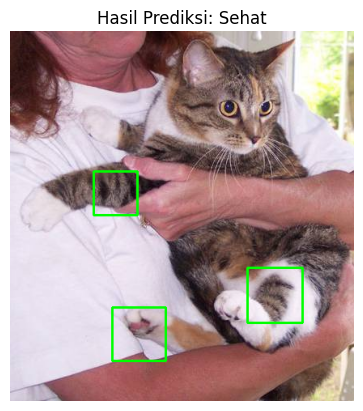

Gambar diprediksi sebagai: Sehat


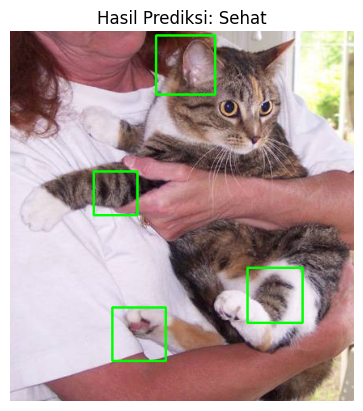

Gambar diprediksi sebagai: Sehat


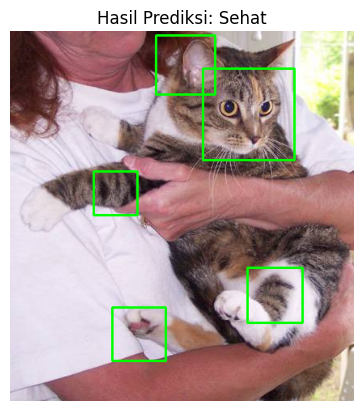

Gambar diprediksi sebagai: Sakit


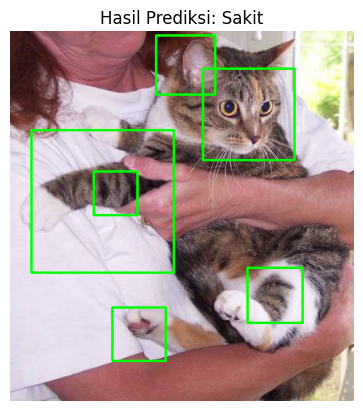

Gambar diprediksi sebagai: Sehat


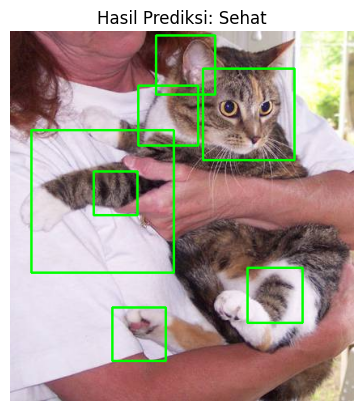

Gambar diprediksi sebagai: Sehat


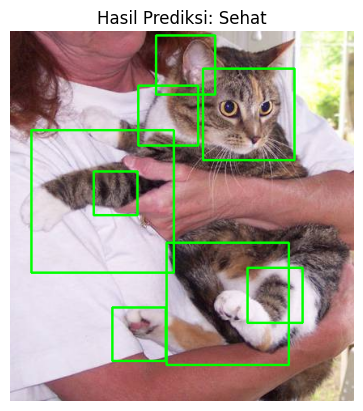

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Path folder gambar utama
folder_path = '/content/drive/MyDrive/DL_ASIK/Gambar/Kucing'
subfolders = ['sakit', 'sehat']  # Subfolder untuk kategori gambar

# Inisialisasi variabel
face_data = []
labels = []
cat_face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/DL_ASIK/haarcascade_frontalcatface.xml')

# Membaca gambar dari setiap subfolder
for label, subfolder in enumerate(subfolders):
    subfolder_path = os.path.join(folder_path, subfolder)
    for filename in os.listdir(subfolder_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(subfolder_path, filename)
            image = cv2.imread(image_path)

            # Mengonversi gambar ke grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Mendeteksi wajah kucing
            faces = cat_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Menyiapkan data untuk pelatihan model ANN
            for (x, y, w, h) in faces:
                face_roi = gray[y:y+h, x:x+w]
                face_resized = cv2.resize(face_roi, (64, 64))  # Resize gambar ke ukuran tetap
                face_flattened = face_resized.flatten()  # Mengubah matriks menjadi vektor satu dimensi
                face_data.append(face_flattened)
                labels.append(label)  # 0 untuk "sakit", 1 untuk "sehat"

face_data = np.array(face_data)
labels = np.array(labels)

# Membagi data menjadi data training dan data testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(face_data, labels, test_size=0.2, random_state=42)

# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model ANN
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp.fit(X_train_scaled, y_train)

# Menguji model menggunakan data testing
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy * 100:.2f}%')

# Menyimpan model setelah pelatihan
model_path = '/content/drive/MyDrive/DL_ASIK/mlp_model.pkl'
joblib.dump(mlp, model_path)
print(f'Model disimpan di {model_path}')

# Menyimpan scaler setelah pelatihan
scaler_path = '/content/drive/MyDrive/DL_ASIK/scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f'Scaler disimpan di {scaler_path}')


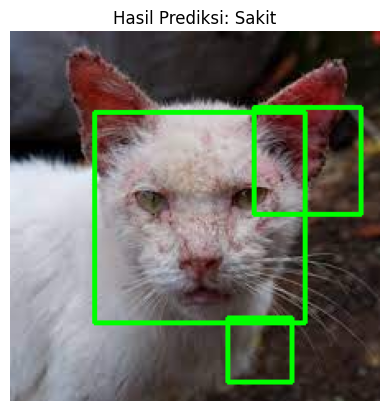

In [15]:
import joblib
import cv2
import matplotlib.pyplot as plt

def predict_cat_health(image_path, model_path, scaler_path, cat_face_cascade_path):
    # Memuat model dan scaler
    mlp = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    cat_face_cascade = cv2.CascadeClassifier(cat_face_cascade_path)

    # Membaca gambar baru
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Mendeteksi wajah kucing
    faces = cat_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        print("Wajah tidak terdeteksi.")
        return None

    # Variabel untuk menyimpan hasil prediksi
    labels = []

    # Preprocessing data dan prediksi untuk setiap wajah
    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face_roi, (64, 64))
        face_flattened = face_resized.flatten()
        face_scaled = scaler.transform([face_flattened])

        # Prediksi kesehatan kucing
        prediction = mlp.predict(face_scaled)
        label = "Sehat" if prediction[0] == 1 else "Sakit"
        labels.append(label)

        # Menambahkan bounding box pada gambar
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Tentukan hasil akhir berdasarkan mayoritas prediksi
    final_label = "Sehat" if labels.count("Sehat") > labels.count("Sakit") else "Sakit"

    # Menampilkan gambar dengan hasil akhir
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f'Hasil Prediksi: {final_label}')
    plt.show()

model_path = '/content/drive/MyDrive/DL_ASIK/mlp_model.pkl'
scaler_path = '/content/drive/MyDrive/DL_ASIK/scaler.pkl'

# Path ke gambar baru
new_image_path = '/content/drive/MyDrive/DL_ASIK/kucingngefly.jpg'

# Memprediksi kesehatan kucing pada gambar baru
predict_cat_health(new_image_path, model_path, scaler_path, '/content/drive/MyDrive/DL_ASIK/haarcascade_frontalcatface.xml')
